# **Tóm tắt Video với Gemini 2.0**

Tóm tắt Video với Gemini 2.0 sử dụng API của Gemini 2.0 để tự động tóm tắt nội dung video thành một đoạn văn ngắn gọn từ 3 đến 5 câu, kèm theo timecode (mốc thời gian) tương ứng. Với sức mạnh của mô hình đa phương thức Gemini 2.0, hệ thống có thể phân tích video đầu vào, nhận dạng nội dung trực quan và âm thanh, từ đó tạo ra bản tóm tắt súc tích, giúp người dùng nhanh chóng nắm bắt thông tin quan trọng mà không cần xem toàn bộ video.

## **Install package**

In [ ]:
!pip install -U -q google-genai


## **Set up API key của bạn**

Để chạy cell, bạn cần lưu API Key vào khóa bí mật.
Nếu bạn chưa có khóa API, bạn có thể lấy nó từ [AI Studio](https://aistudio.google.com/app/apikey).

Để cung cấp khóa API thông qua Colab, hãy chọn biểu tượng chìa khóa bên góc trên bên trái.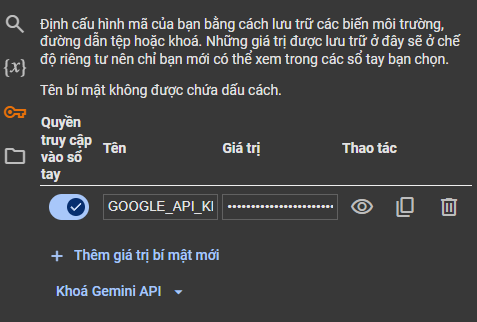

In [ ]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

## Xây dựng ứng dụng

In [ ]:
#Import libraries
import base64
import json

from IPython.display import Audio, Markdown, display
import numpy as np
from websockets.asyncio.client import connect
from google import genai
from google.genai import types
import json
from PIL import Image
from IPython.display import display, Markdown, HTML
import time


In [ ]:
# Initialize GenAI client
client = genai.Client(api_key=GOOGLE_API_KEY)

In [ ]:
#Select the model version
model_name = "gemini-2.0-flash-exp"

In [ ]:
# Load sample video
!wget https://storage.googleapis.com/generativeai-downloads/videos/user_study.mp4 -O User_study.mp4 -q

In [ ]:
#function to upload and process the video
def upload_video(video_file_name):
  video_file = client.files.upload(path=video_file_name)

  while video_file.state == "PROCESSING":
      print('Waiting for video to be processed.')
      time.sleep(10)
      video_file = client.files.get(name=video_file.name)

  if video_file.state == "FAILED":
    raise ValueError(video_file.state)
  print(f'Video processing complete: ' + video_file.uri)

  return video_file

# Upload the sample video 'User_study.mp4' and store the result in user_study_video
user_study_video = upload_video('User_study.mp4')

Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/umgm28pxel6v


In [ ]:
#Generate content using the selected model and prompt
prompt = "Generate a paragraph that summarizes this video. Keep it to 3 to 5 sentences with corresponding timecodes."
video = user_study_video
response = client.models.generate_content(
    model=model_name,
    contents=[
        types.Content(
            role="user",
            parts=[
                types.Part.from_uri(
                    file_uri=video.uri,
                    mime_type=video.mime_type),
                ]),
        prompt,
    ],
)

# Display the response as formatted Markdown
Markdown(response.text)


Certainly! Here's a summary of the video:

The video showcases a mobile application called "My Garden App" where users can browse and purchase plants. The user interacts with the app by clicking on the "Like" button to save plants they like to their profile [00:10-00:27] and then adds plants to the cart by clicking the "Add to Cart" button [00:13-00:45]. The user navigates to the shopping cart section of the app where they see a list of the plants they have added [00:31-00:33], and also navigates to their profile section, where they can view the plants they have liked and how many items are in their cart [00:33-00:35]. Finally, the user navigates back to the home screen, where they browse and like additional plants [00:38-00:42].